# Analysing Indian Recipes

Food - one thing that no one can deny not liking. As a foodie myself, I love food, the spicier the merrier, and there is nothing more spice loaded than my very own Indian Food.

![Indian Food Buffet](https://comps.canstockphoto.com/indian-food-stock-photo_csp9792544.jpg)

Thanks to the effort of [Neha Prabhavalkar](https://www.kaggle.com/nehaprabhavalkar) we have a dataset containing recipes of various Indian cuisines along with ingredients. Let's get cooking!

# Data Preparation and Cleaning

Let's disect the dataset and see what we have in our kitchen before we start cookin



In [1]:
import numpy as np
import pandas as pd

In [2]:
indian_recipes = "input/indian_food.csv"
df_indian_recipes = pd.read_csv(indian_recipes)
print("shape", df_indian_recipes.shape, sep=": ")

print("column types",df_indian_recipes.dtypes, sep=":\n")

shape: (255, 9)
column types:
name              object
ingredients       object
diet              object
prep_time          int64
cook_time          int64
flavor_profile    object
course            object
state             object
region            object
dtype: object


We have 255 recipes, with 9 columns. Each column stores following detail about a recipe:

* *name* : name of the dish
* *ingredients* : main ingredients used
* *diet* : type of diet - either vegetarian or non vegetarian
* *prep_time* : preparation time
* *cook_time* : cooking time
* *flavor_profile* : flavor profile includes whether the dish is spicy, sweet, bitter, etc
* *course* : course of meal - starter, main course, dessert, etc
* *state* : state where the dish is famous or is originated
* *region* : region where the state belongs

Note: Presence of -1 in any of the columns indicates NaN value.

Let's replace -1 to NaN so we have clear picture of the data and see how many different values we have.

In [3]:
df_indian_recipes.replace(-1, np.NaN, inplace = True)
df_indian_recipes.replace("-1", np.NaN, inplace = True)
df_indian_recipes.nunique()

name              255
ingredients       252
diet                2
prep_time          21
cook_time          18
flavor_profile      4
course              4
state              24
region              6
dtype: int64

In [4]:
df_indian_recipes.head()

name                                        ingredients  \
0      Balu shahi                    Maida flour, yogurt, oil, sugar   
1          Boondi                            Gram flour, ghee, sugar   
2  Gajar ka halwa       Carrots, milk, sugar, ghee, cashews, raisins   
3          Ghevar  Flour, ghee, kewra, milk, clarified butter, su...   
4     Gulab jamun  Milk powder, plain flour, baking powder, ghee,...   

         diet  prep_time  cook_time flavor_profile   course        state  \
0  vegetarian       45.0       25.0          sweet  dessert  West Bengal   
1  vegetarian       80.0       30.0          sweet  dessert    Rajasthan   
2  vegetarian       15.0       60.0          sweet  dessert       Punjab   
3  vegetarian       15.0       30.0          sweet  dessert    Rajasthan   
4  vegetarian       15.0       40.0          sweet  dessert  West Bengal   

  region  
0   East  
1   West  
2  North  
3   West  
4   East

In [5]:
ingredients = set()
for item in df_indian_recipes['ingredients']:
    ingredients.update(str(item).lower().split(","))
    
print("Total unique ingredients in dataset",len(ingredients),sep=": ")

Total unique ingredients in dataset: 425


In [6]:
print("Are there any NA values in any column", df_indian_recipes.isna().sum(), sep=":\n")

Are there any NA values in any column:
name               0
ingredients        0
diet               0
prep_time         30
cook_time         28
flavor_profile    29
course             0
state             24
region            14
dtype: int64


# Exploratory Analysis and Visualization

Let's explore which dish to cook.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [7]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Let's check which state dominates with the dishes in the dataset.

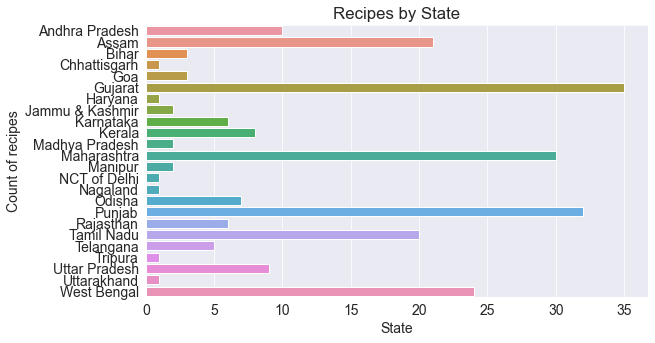

In [8]:
recipe_by_state = df_indian_recipes.groupby('state').size().to_frame(name = "count").reset_index()
sns.barplot(x = 'count', y='state', data = recipe_by_state )

plt.title("Recipes by State")
plt.xlabel("State")
plt.ylabel("Count of recipes")

plt.show()

What's the veg vs non-veg ratio

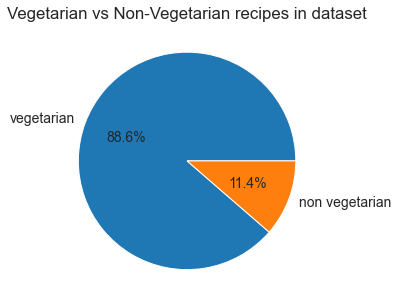

In [9]:
df_diet_type = df_indian_recipes.diet.value_counts().reset_index()
plt.pie(df_diet_type.diet, labels = df_diet_type['index'],autopct='%1.1f%%')
plt.title("Vegetarian vs Non-Vegetarian recipes in dataset")
plt.show()

Let's review types of dishes in the dataset

In [10]:
df_course = df_indian_recipes.course.value_counts().reset_index()
sns.barplot(x = 'course', y = 'index', data = df_course)

plt.title("Cuisines")
plt.show()

Eating is the quickest part of food, let's see how much time it takes to make them

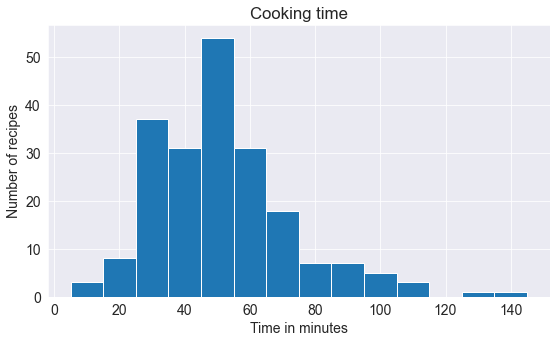

In [11]:
df_cook_time = (df_indian_recipes.prep_time + df_indian_recipes.cook_time).to_frame('total_time').reset_index()
plt.hist(df_cook_time['total_time'],np.arange(5,150,10))

plt.title("Cooking time")
plt.ylabel("Number of recipes")
plt.xlabel("Time in minutes")

plt.show()

# Asking and Answering Questions

Let's change from chef's clothes and get the science overcoat and grill the dataset



Which type of cuisine takes maximum cooking time?

In [12]:
df_temp = df_indian_recipes
df_temp['total_time'] = df_indian_recipes.prep_time + df_indian_recipes.cook_time
df_temp.sort_values('total_time',ascending = False).head()[['name','course','total_time']]

name       course  total_time
62     Shrikhand      dessert       730.0
114  Pindi chana  main course       620.0
155        Puttu  main course       535.0
29     Misti doi      dessert       510.0
128         Dosa        snack       450.0

Which Uttar Pradesh dish has maximum ingredients ?

In [13]:
df_up_dishes = (df_indian_recipes[df_indian_recipes['state'] == "Uttar Pradesh"][['name','ingredients']])
def count_ingredient(column):
    return len(column.split(","))
df_up_dishes['ingredient_count'] = df_up_dishes['ingredients'].apply(count_ingredient)

In [14]:
df_up_dishes.sort_values('ingredient_count', ascending = False).head()

name                                        ingredients  \
6             Jalebi  Maida, corn flour, baking soda, vinegar, curd,...   
90           Kachori  Moong dal, rava, garam masala, dough, fennel s...   
95             Kofta    Paneer, potato, cream, corn flour, garam masala   
97    Lauki ke kofte  Bottle gourd, garam masala powder, gram flour,...   
105  Navrattan korma  Green beans, potatoes, khus khus, low fat, gar...   

     ingredient_count  
6                   9  
90                  5  
95                  5  
97                  5  
105                 5

![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/48/Jalebi_-_Closeup_View_of_Jalebis.JPG/320px-Jalebi_-_Closeup_View_of_Jalebis.JPG)

Which is most time consuming vegetarian main course?

In [15]:
df_temp[(df_temp['diet'] == 'vegetarian') & (df_temp['course'] == 'main course')].sort_values("total_time", ascending= False).head()

name                                        ingredients  \
114     Pindi chana   Fennel, tea bags, tomato, kasuri methi, cinnamon   
155           Puttu            Brown rice flour, sugar, grated coconut   
46   Obbattu holige  Maida flour, turmeric, coconut, chickpeas, jag...   
157         Sandige  Thin rice flakes, black sesame seeds, curry le...   
158           Sevai                     Sevai, parboiled rice, steamer   

           diet  prep_time  cook_time flavor_profile       course      state  \
114  vegetarian      500.0      120.0          spicy  main course     Punjab   
155  vegetarian      495.0       40.0            NaN  main course     Kerala   
46   vegetarian      180.0       60.0          sweet  main course  Karnataka   
157  vegetarian      120.0       60.0            NaN  main course  Karnataka   
158  vegetarian      120.0       30.0            NaN  main course        NaN   

    region  total_time  
114  North       620.0  
155  South       535.0  
46   South       240.0  
157  South       180.0  
158  South       150.0

Pindi chana definetly has taken me quite long time to prepare.
![](https://snappygoat.com/b/9b7a98ab492ff24ebb95dbc9291763593ca55351)

Which is least time consuming non-vegetarian main course?

In [16]:
df_temp[(df_temp['diet'] == 'non vegetarian') & (df_temp['course'] == 'main course')].sort_values('total_time', ascending = False).head()

name                                        ingredients  \
122   Tandoori Chicken  Greek yogurt, garam masala, kasuri methi, mari...   
75             Biryani  Chicken thighs, basmati rice, star anise, swee...   
137           Beef Fry  Beef, coconut, garam masala, curry leaves, gre...   
247  Prawn malai curry      Coconut milk, prawns, garlic, turmeric, sugar   
235           Haq Maas  Lamb, garam masala powder, curd, turmeric, bay...   

               diet  prep_time  cook_time flavor_profile       course  \
122  non vegetarian      240.0       30.0          spicy  main course   
75   non vegetarian       30.0      120.0          spicy  main course   
137  non vegetarian       10.0       60.0          spicy  main course   
247  non vegetarian       15.0       50.0          spicy  main course   
235  non vegetarian       20.0       40.0          spicy  main course   

           state      region  total_time  
122       Punjab       North       270.0  
75     Telangana       South       150.0  
137       Kerala       South        70.0  
247  West Bengal        East        65.0  
235        Assam  North East        60.0

Which is the most time consuming dessert to prepare?

In [17]:
df_temp[(df_temp['course'] == 'dessert')].sort_values('total_time', ascending = False).head()

name                      ingredients        diet  prep_time  \
62       Shrikhand   Curd, sugar, saffron, cardamom  vegetarian       10.0   
29       Misti doi                    Milk, jaggery  vegetarian      480.0   
48        Poornalu               Chana dal, jaggery  vegetarian      240.0   
66  Chak Hao Kheer      Rice, milk, sugar, cardamom  vegetarian      240.0   
33       Ras malai  Chhena, reduced milk, pistachio  vegetarian      180.0   

    cook_time flavor_profile   course           state      region  total_time  
62      720.0          sweet  dessert     Maharashtra        West       730.0  
29       30.0          sweet  dessert     West Bengal        East       510.0  
48       60.0          sweet  dessert  Andhra Pradesh       South       300.0  
66       45.0          sweet  dessert         Manipur  North East       285.0  
33       60.0          sweet  dessert     West Bengal        East       240.0

# References and Future Work

All this food will make and data scientist happy, but let's not stop at the first round of the buffet and review other [great notebooks](https://www.kaggle.com/nehaprabhavalkar/indian-cuisine-analysis/data) on the same dataset